In [2]:
import numpy as np
#data.groupby(['home_team','events']).agg('count')
#from pybaseball import statcast
import pandas as pd
import pymongo
import operator
import boto3
import pymongo
import scipy.stats as stats
#app = Flask(__name__)
from random import randint
import json

#df=pd.read_csv('data.csv')
c = boto3.client('s3')
obj = c.get_object(Bucket='baseballs3', Key='data.csv')
data = pd.read_csv(obj['Body'])

Welcome to the Batting Adaptability Statistic Jupyter Notebook.
the main function computes basic Batting Adaptability





In [136]:
def main(batter,pitcher):
    df=data.copy()
    df=df.loc[df['batter']==batter]
    #print(df)
    #print(df.groupby('player_name').agg('count').nlargest(10,'index'))
    if pitcher=='all':
        print('all')
    else:
        df=df.loc[df['player_name']==pitcher]
    #print(df)
    P=0
    d={}
    stand=[]
    for i,x in df.iterrows():
        if x['stand'] not in stand:
            stand.append(x['stand'])
        if type(x['pitch_type'])==type('s'):
            if x['pitch_type'] not in [*d]:
                d[x['pitch_type']]=[0,0]
            if x['description']=='foul' or x['description']=='foul_tip' or x['description']=='foul_bunt':
                d[x['pitch_type']][1]+=1.0
            if x['description']=='swinging_strike' or x['description']=='swinging_strike_blocked' or x['description']=='called_strike' or x['description']=='missed_bunt' or x['description']=='swinging_pitchout':
                d[x['pitch_type']][1]+=1.0
            if x['description']=='hit_into_play' or x['description']=='hit_into_play_no_out' or x['description']=='hit_into_play_score':
                d[x['pitch_type']][0]+=1.0
                d[x['pitch_type']][1]+=1.0
    arr=[]
    for y in [*d]:
        if d[y][1]>0:
                arr.append(d[y][0]/d[y][1])
    s=0
    for x in arr:
        s+=(x-np.mean(arr))**2
    d['Batting Adaptability']=s/(len(arr)-1)
    return d

#print(data.groupby('description').agg('count').index)
#print(data.groupby('stand').agg('count').index)




In [137]:
print('Mookie Betts',main(605141.0,'all')['Batting Adaptability'])#righty
print('J.D. Martinez',main(502110.0,'all')['Batting Adaptability'])#righty
print('Christian Yelich',main(592885.0,'all')['Batting Adaptability'])#lefty
print('Jose Altuve',main(514888.0,'all')['Batting Adaptability'])#righty
print('Mike Trout',main(545361.0,'all')['Batting Adaptability'])#righty
#The top 5 batters as listed on http://www.espn.com/mlb/stats/batting/_/year/2018
# *for the 2018 season

all
Mookie Betts 0.0033835732052613227
all
J.D. Martinez 0.0045079112660191085
all
Christian Yelich 0.009169417311413346
all
Jose Altuve 0.015079960867130034
all
Mike Trout 0.009646876270129437


In [138]:
Blake=main(605141.0,'Blake Snell')#lefty
Happ=main(605141.0,'J.A. Happ')#lefty
CC=main(605141.0,'CC Sabathia')#lefty
luis=main(605141.0,'Luis Severino')#righty
masahiro=main(605141.0,'Masahiro Tanaka')#righty
dylan=main(605141.0,'Dylan Bundy')#righty


all
Marwin Gonzales {'FF': [121.0, 416.0], 'KC': [11.0, 65.0], 'CU': [19.0, 156.0], 'CH': [62.0, 221.0], 'FT': [62.0, 172.0], 'FC': [23.0, 102.0], 'SL': [38.0, 190.0], 'SI': [48.0, 144.0], 'FS': [6.0, 21.0], 'PO': [0, 0], 'KN': [2.0, 5.0], 'FO': [0, 1.0], 'EP': [1.0, 1.0], 'Batting Adaptability': 0.059951239225044556}
all
0.909
0.031
0.0
0.704
0.998
0.185
0.015
0.964
0.504
0.585


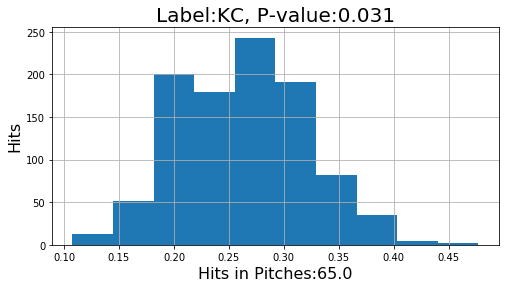

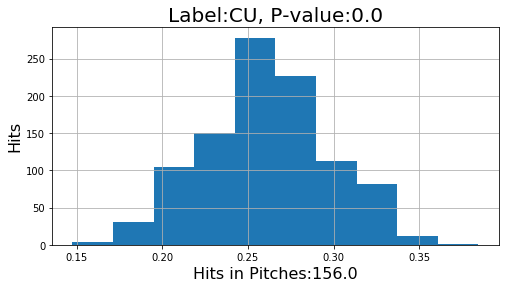

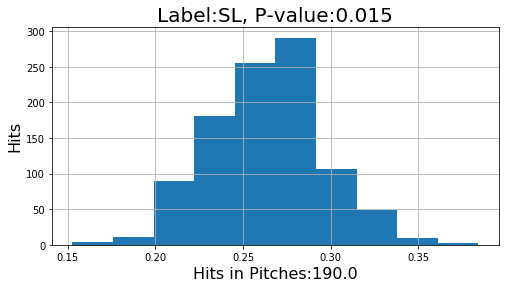

In [139]:
#bad kid
#Batting Average 2018: 0.247 https://www.mlb.com/player/marwin-gonzalez-503556
import matplotlib.pylab as plt
print('Marwin Gonzales',main(503556.0,'all'))#102nd in ranked batting
d=main(503556.0,'all')
arr=[]
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][1])):
                arr.append(0)
s=0
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][0])):
                s+=1
for i in range(0,s):
    arr[i] = 1
    
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            trials = [0] * 1000
            for i in range(0,1000):
                countForTrial = 0
                for j in range(0,round(d[y][1])):
                    z = randint(0,len(arr)-1)
                    countForTrial+=arr[z]
                trials[i] = countForTrial/round(d[y][1])
            trials.sort()
            tr = 0
            for t in trials:
                #print((t-(d[y][x][0]/d[y][x][1]))**2,(0.5)**2)
                if t<(d[y][0]/d[y][1]):#Null hypothesis: The batter performs statistically better when receiving pitch type y 
                    tr+=1
            print(tr/1000)
            if tr/1000<0.05:
                df = pd.DataFrame(trials)
                #print(df.describe())
                # Initialize figure and axis
                fig, ax = plt.subplots(figsize=(8,4))

                # Plot histogram 
                df.hist(ax=ax);
                # Add a title
                ax.set_title('Label:'+str(y)+', P-value:'+str((tr/1000)), fontsize=20)

                # Add axis labels 
                ax.set_xlabel('Hits in Pitches:'+str(d[y][1]), fontsize=16)
                ax.set_ylabel("Hits", fontsize=16)


#Any graphs printed out reject the Null Hypothesis that The batter performs statistically better when receiving pitch type y 


all
Mookie Betts {'FT': [61.0, 162.0], 'KC': [7.0, 24.0], 'SL': [77.0, 316.0], 'CH': [57.0, 168.0], 'FF': [178.0, 600.0], 'FC': [28.0, 77.0], 'CU': [20.0, 102.0], 'SI': [36.0, 137.0], 'FS': [11.0, 35.0], 'Batting Adaptability': 0.0033835732052613227}
all
0.985
0.418
0.025
0.882
0.568
0.893
0.008
0.196
0.574


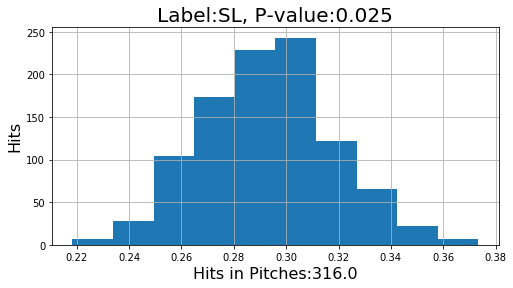

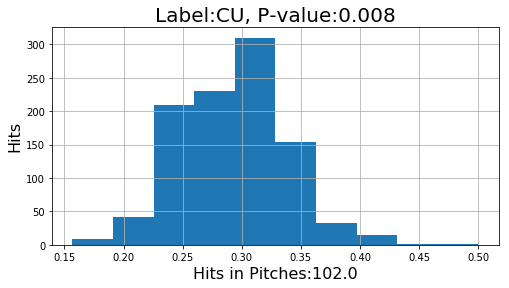

In [144]:
import matplotlib.pylab as plt
print('Mookie Betts',main(605141.0,'all'))#1st in ranked batting
d=main(605141.0,'all')
arr=[]
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][1])):
                arr.append(0)
s=0
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][0])):
                s+=1
for i in range(0,s):
    arr[i] = 1
    
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            trials = [0] * 1000
            for i in range(0,1000):
                countForTrial = 0
                for j in range(0,round(d[y][1])):
                    z = randint(0,len(arr)-1)
                    countForTrial+=arr[z]
                trials[i] = countForTrial/round(d[y][1])
            trials.sort()
            tr = 0
            for t in trials:
                #print((t-(d[y][x][0]/d[y][x][1]))**2,(0.5)**2)
                if t<(d[y][0]/d[y][1]):#Null hypothesis: The batter performs statistically better when receiving pitch type y 
                    tr+=1
            print(tr/1000)
            if tr/1000<0.05:
                df = pd.DataFrame(trials)
                #print(df.describe())
                # Initialize figure and axis
                fig, ax = plt.subplots(figsize=(8,4))

                # Plot histogram 
                df.hist(ax=ax);
                # Add a title
                ax.set_title('Label:'+str(y)+', P-value:'+str((tr/1000)), fontsize=20)

                # Add axis labels 
                ax.set_xlabel('Hits in Pitches:'+str(d[y][1]), fontsize=16)
                ax.set_ylabel("Hits", fontsize=16)


#Any graphs printed out reject the Null Hypothesis that The batter performs statistically better when receiving pitch type y 


In [141]:
def test(batter,h,p):
    d=main(batter,'all')
    arr=[]
    for y in [*d]:
        if y!='Batting Adaptability':
            if d[y][1]>1:
                for i in range(round(p)):
                    arr.append(0)
    s=0
    for y in [*d]:
        if y!='Batting Adaptability':
            if d[y][1]>1:
                for i in range(round(h)):
                    s+=1
    for i in range(0,s):
        arr[i] = 1


    trials = [0] * 1000
    for i in range(0,1000):
        countForTrial = 0
        for j in range(0,round(p)):
            z = randint(0,len(arr)-1)
            countForTrial+=arr[z]
        trials[i] = countForTrial/round(p)
    trials.sort()
    tr = 0
    for t in trials:
        if t<(float(h)/float(p)):#Null hypothesis: The batter performs statistically better when receiving pitch type y 
            tr+=1

    df = pd.DataFrame(trials)
    fig, ax = plt.subplots(figsize=(8,4))
    df.hist(ax=ax);
    ax.set_title('Label:'+str(batter)+', P-value:'+str((tr/1000)), fontsize=20)
    ax.set_xlabel('Hits in Pitches:'+str(p), fontsize=16)
    ax.set_ylabel("Hits", fontsize=16)
    return tr/1000




In [142]:
print(data.groupby('description').agg('count').index)

Index(['ball', 'blocked_ball', 'called_strike', 'foul', 'foul_bunt',
       'foul_pitchout', 'foul_tip', 'hit_by_pitch', 'hit_into_play',
       'hit_into_play_no_out', 'hit_into_play_score', 'missed_bunt',
       'pitchout', 'swinging_pitchout', 'swinging_strike',
       'swinging_strike_blocked'],
      dtype='object', name='description')


/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


[('Luis Severino', 0.01327491792346363), ('J.A. Happ', 0.0175), ('Blake Snell', 0.017726154820171907), ('Dylan Bundy', 0.041802112029384754), ('Yefry Ramirez', 0.04478458049886621), ('Masahiro Tanaka', 0.058319449784271), ('CC Sabathia', 0.1917517006802721)]
 
SL
FC
SI
CH
Batting Adaptability
0.858
0.139
0.0
0.908


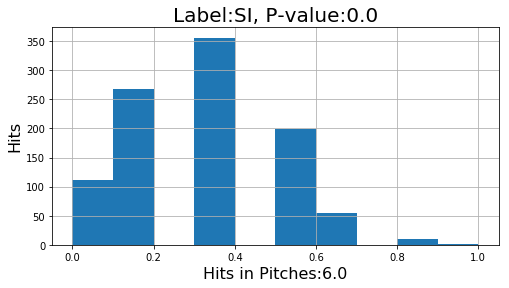

In [154]:
def pitchAll(batter):
    dfo=data.copy()
    dfo=dfo.loc[dfo['batter']==batter].copy()
    master={}
    for pitcher in dfo.groupby('player_name').agg('count').index:
        df=dfo.loc[dfo['player_name']==pitcher].copy()
        #print(df)
        P=0
        d={}
        stand=[]
        c=0#used to determine if pitcher has pitched enough to be taken seriously
        for i,x in df.iterrows():
            if x['stand'] not in stand:
                stand.append(x['stand'])
            if type(x['pitch_type'])==type('s'):
                if x['pitch_type'] not in [*d]:
                    d[x['pitch_type']]=[0,0]
                    c+=1
                if x['description']=='foul' or x['description']=='foul_tip' or x['description']=='foul_bunt':
                    d[x['pitch_type']][1]+=1.0
                    c+=1
                if x['description']=='swinging_strike' or x['description']=='swinging_strike_blocked' or x['description']=='called_strike' or x['description']=='missed_bunt' or x['description']=='swinging_pitchout':
                    d[x['pitch_type']][1]+=1.0
                    c+=1
                if x['description']=='hit_into_play' or x['description']=='hit_into_play_no_out' or x['description']=='hit_into_play_score':
                    d[x['pitch_type']][0]+=1.0
                    d[x['pitch_type']][1]+=1.0
                    c+=1
        arr=[]
        for y in [*d]:
            if d[y][1]>0:
                    arr.append(d[y][0]/d[y][1])
        s=0
        for x in arr:
            s+=(x-np.mean(arr))**2
        d['Batting Adaptability']=s/(len(arr)-1)
        if c>30.0 and len(df.groupby(['game_date','home_team','away_team','at_bat_number']).agg('count'))>0:#30 pitches means at least 10 at bats against batter which seems reasonable
            master[pitcher]=d['Batting Adaptability']
    return master
l=pitchAll(605141.0)#Mookie Betts

print(sorted(l.items(), key=operator.itemgetter(1)))
print(' ')
for z in main(605141.0,'CC Sabathia'):
    print(z)
#print(main())

d=main(605141.0,'CC Sabathia')
arr=[]
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][1])):
                arr.append(0)
s=0
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            for i in range(round(d[y][0])):
                s+=1
for i in range(0,s):
    arr[i] = 1
    
for y in [*d]:
    if y!='Batting Adaptability':
        if d[y][1]>1:
            trials = [0] * 1000
            for i in range(0,1000):
                countForTrial = 0
                for j in range(0,round(d[y][1])):
                    z = randint(0,len(arr)-1)
                    countForTrial+=arr[z]
                trials[i] = countForTrial/round(d[y][1])
            trials.sort()
            tr = 0
            for t in trials:
                #print((t-(d[y][x][0]/d[y][x][1]))**2,(0.5)**2)
                if t<(d[y][0]/d[y][1]):#Null hypothesis: The batter performs statistically better when receiving pitch type y 
                    tr+=1
            print(tr/1000)
            if tr/1000<0.05:
                df = pd.DataFrame(trials)
                #print(df.describe())
                # Initialize figure and axis
                fig, ax = plt.subplots(figsize=(8,4))

                # Plot histogram 
                df.hist(ax=ax);
                # Add a title
                ax.set_title('Label:'+str(y)+', P-value:'+str((tr/1000)), fontsize=20)

                # Add axis labels 
                ax.set_xlabel('Hits in Pitches:'+str(d[y][1]), fontsize=16)
                ax.set_ylabel("Hits", fontsize=16)



#Any graphs printed out reject the Null Hypothesis that The batter performs statistically better when receiving pitch type y 


In [152]:
def BattingAvg(batter,pitcher):
    df=data.copy()
    #print(len(df))
    df=df.loc[df['player_name']==pitcher].copy()
    #print(len(df))
    df=df.loc[df['batter']==batter].copy()
    #print(len(df))
    hr=0
    hits=0
    doubles=0
    triples=0
    for i,x in df.iterrows():
        if x['events']=='single':
            hits+=1
        elif x['events']=='double':
            doubles+=1
        elif x['events']=='triple':
            triples+=1
        elif x['events']=='home_run':
            hr+=1
    AB=len(df.groupby(['game_date','home_team','away_team','at_bat_number']).agg('count'))#at_bat_number=unique At bat id
    BA=float(hits+doubles+2.0*triples+3.0*hr)/float(AB)
    return BA
def OBP(batter,pitcher):
    df=data.copy()
    df=df.loc[df['player_name']==pitcher].copy()
    df=df.loc[df['batter']==batter].copy()
    HBP=0
    H=0
    BB=0
    SF=0
    AB=len(df.groupby(['game_date','home_team','away_team','at_bat_number']).agg('count'))
    #print(AB)#at_bat_number=unique At bat id)
    for i,x in df.iterrows():
        if x['description']=='hit_into_play' or x['description']=='hit_into_play_no_out' or x['description']=='hit_into_play_score':
            H+=1
        elif x['events']=='walk':
            BB+=1
        if x['description']=='hit_by_pitch':
            HBP+=1
        if x['description']=='sac_fly' or x['description']=='sac_fly_double_play':
            SF+=1
    try:
        OBP=float(H+BB+HBP)/float(AB+BB+HBP+SF)
    except:
        print('')
    return OBP
print(data.groupby('description').agg('count').index)

Index(['ball', 'blocked_ball', 'called_strike', 'foul', 'foul_bunt',
       'foul_pitchout', 'foul_tip', 'hit_by_pitch', 'hit_into_play',
       'hit_into_play_no_out', 'hit_into_play_score', 'missed_bunt',
       'pitchout', 'swinging_pitchout', 'swinging_strike',
       'swinging_strike_blocked'],
      dtype='object', name='description')


# Evaluation
For the evaluation of the Batting Adaptability statistic we have elected to select the 5 best batters as we did earlier and in order to get a better idea of what most players can get out of the statistic we have selected 5 batters who rank from 101-105 on espn's batting rankings.

In [181]:
#print(data.groupby('description').agg('count').index)
#print(' ')
#print(data.groupby('events').agg('count').index)
import scipy
def BAvsBA(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(BattingAvg(batter,k))
    X=[]
    for i in [*l]:
        X.append(l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]
def AltBAvsBA(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(BattingAvg(batter,k))
    X=[]
    for i in [*l]:
        X.append(BattingAvg(batter,i)/l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]
def AltOBPvsBA(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(OBP(batter,k))
    X=[]
    for i in [*l]:
        X.append(OBP(batter,i)/l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]
def OBPvsBA(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(OBP(batter,k))
    X=[]
    for i in [*l]:
        X.append(l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]

#the best
print("OBP vs Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',OBPvsBA(605141.0))#righty
print('J.D. Martinez',OBPvsBA(502110.0))#righty
print('Christian Yelich',OBPvsBA(592885.0))#lefty
print('Jose Altuve',OBPvsBA(514888.0))#righty
print('Mike Trout',OBPvsBA(545361.0))#righty
print('')
print('Top 101-105 Batters')
print('Freddy Galvis',OBPvsBA(520471.0))#101
print('Marwin Gonzalez',OBPvsBA(503556.0))#102
print('Matt Olson',OBPvsBA(621566.0))#103
print('Khris Davis',OBPvsBA(501981.0))#l04
print('Edwin Encarnacion',OBPvsBA(429665.0))#105
print('')
print("BA vs Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',BAvsBA(605141.0))#righty
print('J.D. Martinez',BAvsBA(502110.0))#righty
print('Christian Yelich',BAvsBA(592885.0))#lefty
print('Jose Altuve',BAvsBA(514888.0))#righty
print('Mike Trout',BAvsBA(545361.0))#righty
print('')
print('Top 101-105 Batters')
print('Freddy Galvis',BAvsBA(520471.0))#101
print('Marwin Gonzalez',BAvsBA(503556.0))#102
print('Matt Olson',BAvsBA(621566.0))#103
print('Khris Davis',BAvsBA(501981.0))#l04
print('Edwin Encarnacion',BAvsBA(429665.0))#105
#the best
print('')
print("OBP vs OBP/Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',AltOBPvsBA(605141.0))#righty
print('J.D. Martinez',AltOBPvsBA(502110.0))#righty
print('Christian Yelich',AltOBPvsBA(592885.0))#lefty
print('Jose Altuve',AltOBPvsBA(514888.0))#righty
print('Mike Trout',AltOBPvsBA(545361.0))#righty
print('Top 101-105 Batters')
print('Freddy Galvis',AltOBPvsBA(520471.0))#101
print('Marwin Gonzalez',AltOBPvsBA(503556.0))#102
print('Matt Olson',AltOBPvsBA(621566.0))#103
print('Khris Davis',AltOBPvsBA(501981.0))#l04
print('Edwin Encarnacion',AltOBPvsBA(429665.0))#105
print('')
print("BA vs BA/Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',AltBAvsBA(605141.0))#righty
print('J.D. Martinez',AltBAvsBA(502110.0))#righty
print('Christian Yelich',AltBAvsBA(592885.0))#lefty
print('Jose Altuve',AltBAvsBA(514888.0))#righty
print('Mike Trout',AltBAvsBA(545361.0))#righty
print('Top 101-105 Batters')
print('Freddy Galvis',AltBAvsBA(520471.0))#101
print('Marwin Gonzalez',AltBAvsBA(503556.0))#102
print('Matt Olson',AltBAvsBA(621566.0))#103
print('Khris Davis',AltBAvsBA(501981.0))#l04
print('Edwin Encarnacion',AltBAvsBA(429665.0))#105


OBP vs Batting Adaptability
Top 5 Batters


/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


Mookie Betts 0.586707823799417
J.D. Martinez 0.24255396280712052
Christian Yelich -0.17402119041250871
Jose Altuve 0.14422489102562655
Mike Trout -0.10426271850470041

Top 101-105 Batters
Freddy Galvis 0.8153061751908606
Marwin Gonzalez -0.34883128762525006
Matt Olson 0.7207989070969198
Khris Davis 0.9145026245621891
Edwin Encarnacion 0.9257020906869178

BA vs Batting Adaptability
Top 5 Batters
Mookie Betts 0.15756063992429345
J.D. Martinez 0.7044299372912706
Christian Yelich -0.7096669242064406
Jose Altuve 0.0005403330666254723
Mike Trout 0.18394295863277088

Top 101-105 Batters
Freddy Galvis 0.6133126282435943
Marwin Gonzalez 0.11664395583327512
Matt Olson 0.9048863233377867
Khris Davis -0.1233411740315643
Edwin Encarnacion 0.07234130691565359

OBP vs OBP/Batting Adaptability
Top 5 Batters
Mookie Betts -0.7388110294308894
J.D. Martinez -0.4705647843461744
Christian Yelich 0.6899351153424604
Jose Altuve 0.41056994034269295
Mike Trout 0.4829417951663881
Top 101-105 Batters
Freddy Galvi

In [182]:
def new1(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(OBP(batter,k))
    X=[]
    for i in [*l]:
        X.append(BattingAvg(batter,i)/l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]
def new2(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(BattingAvg(batter,k))
    X=[]
    for i in [*l]:
        X.append(OBP(batter,i)/l[i])
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]

print("new1: Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',new1(605141.0))#righty
print('J.D. Martinez',new1(502110.0))#righty
print('Christian Yelich',new1(592885.0))#lefty
print('Jose Altuve',new1(514888.0))#righty
print('Mike Trout',new1(545361.0))#righty
print('Top 101-105 Batters')
print('Freddy Galvis',new1(520471.0))#101
print('Marwin Gonzalez',new1(503556.0))#102
print('Matt Olson',new1(621566.0))#103
print('Khris Davis',new1(501981.0))#l04
print('Edwin Encarnacion',new1(429665.0))#105



new1: Batting Adaptability
Top 5 Batters


/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


Mookie Betts -0.6697479498937795
J.D. Martinez 0.2560947518671545
Christian Yelich -0.46409058939008446
Jose Altuve 0.48036936151809656
Mike Trout 0.46442737966046277
Top 101-105 Batters
Freddy Galvis -0.7389852812231363
Marwin Gonzalez 0.5621859904478407
Matt Olson 0.054065727362077765
Khris Davis -0.2711697917122451
Edwin Encarnacion -0.011983117394028407


In [183]:
print("new2: Batting Adaptability")
print('Top 5 Batters')
print('Mookie Betts',new2(605141.0))#righty
print('J.D. Martinez',new2(502110.0))#righty
print('Christian Yelich',new2(592885.0))#lefty
print('Jose Altuve',new2(514888.0))#righty
print('Mike Trout',new2(545361.0))#righty
print('Top 101-105 Batters')
print('Freddy Galvis',new2(520471.0))#101
print('Marwin Gonzalez',new2(503556.0))#102
print('Matt Olson',new2(621566.0))#103
print('Khris Davis',new2(501981.0))#l04
print('Edwin Encarnacion',new2(429665.0))#105


new2: Batting Adaptability
Top 5 Batters


/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


Mookie Betts -0.6348400872724103
J.D. Martinez -0.722621773841655
Christian Yelich 0.2205536727021421
Jose Altuve 0.2329515755395952
Mike Trout -0.5256600426217561
Top 101-105 Batters
Freddy Galvis -0.6941361536729637
Marwin Gonzalez -0.22361019255085698
Matt Olson -0.717095772327488
Khris Davis 0.3773728916965399
Edwin Encarnacion 0.3310277536058969


We spent a great deal of time hacking away with our statistic to try and find some way to correlate Batting Adaptability with either Batting Averages, and OBP all have to do with hitting the ball and getting on base. However, there has been no clear correlation between any of the forms of Batting Adaptability attempted above. First the process here was fairly simple in calculating a correlation coefficient. We split the groups up into batters and their pitchers and then ran pearson's R with X being the OBP or Batting averages and Y being the Batting Adaptability scores for each pitcher met by the batter. After calculating Pearson's R for Batting Adaptability and OBP as well as Batting Adaptability and Batting Averages it was fairly clear that these statistics did not correlate, some players had positive R values, some had negative, some had values near 0, and some even had values near 1 and -1. We did not expect these statistics to correlate given that the variance we are calculating only measures the consistency/variance of the groups. As in someone who only hits 1/100 balls but does so everytime regardless of pitching type or pitcher will have an amazing Batting Adaptability Score; It is a fair assumption that said player's OBP would not correlate with his Batting Adaptability. However, due to the small nature of batting Adaptability if you divide a number by it will increase. So, in order to try and force the relationship to exist we played around with some variants of Batting Adaptability and attempted to correlate them with OBP and BA. The first Batting Adaptability Alternate attempted to correlate OBP divided by Batting Adaptability with OBP. This Alternate did not improve correlations between Batting Adaptability and their Batting Averages, the R-values per batter seemed just as varied as before. After this we attempted to reverse our first alternate Batting Adaptability by correlating Batting Averages divided by Batting Adaptability with Batting Averages. This attempt also Flopped, so next we tried to correlate OBP divided by Batting Adaptability with Batting Averages and vice versa in regards to OBP and Batting Averages. Both of these attempts also flopped, there is still no clear correlation between Batting Adaptability and the most similar statistic. 

In [184]:
def OBPvsBA(batter):
    l=pitchAll(batter)
    #print(sorted(l.items(), key=operator.itemgetter(1)))
    Y=[]

    for k in [*l]:
        Y.append(BattingAvg(batter,k))
    X=[]
    for i in [*l]:
        X.append(OBP(batter,i))
    #print(X,Y)
    return scipy.stats.pearsonr(X,Y)[0]
print("OBP vs BA")
print('Top 5 Batters')
print('Mookie Betts',OBPvsBA(605141.0))#righty
print('J.D. Martinez',OBPvsBA(502110.0))#righty
print('Christian Yelich',OBPvsBA(592885.0))#lefty
print('Jose Altuve',OBPvsBA(514888.0))#righty
print('Mike Trout',OBPvsBA(545361.0))#righty
print('Top 101-105 Batters')
print('Freddy Galvis',OBPvsBA(520471.0))#101
print('Marwin Gonzalez',OBPvsBA(503556.0))#102
print('Matt Olson',OBPvsBA(621566.0))#103
print('Khris Davis',OBPvsBA(501981.0))#l04
print('Edwin Encarnacion',OBPvsBA(429665.0))#105

OBP vs BA
Top 5 Batters


/Users/jakeliebow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


Mookie Betts 0.4692349845307072
J.D. Martinez 0.5767131295649319
Christian Yelich -0.47300269044622484
Jose Altuve 0.8158650480226813
Mike Trout 0.11783675931257963
Top 101-105 Batters
Freddy Galvis 0.5456015448999267
Marwin Gonzalez 0.6203353248720183
Matt Olson 0.7590298942793021
Khris Davis 0.0021625959535076554
Edwin Encarnacion 0.36480199948918857


In order to see if our goals in finding a correlation between Batting Adaptability and other statistics like OBP and BA was reasonable we decided to find the correlation between Batting Averages and On Base Percentage. There is not a consistent correlation here either so it will likley be fruitless to continue trying to force correlations between a variance like Batting Adaptability and a value like OBP or Batting Average.

In conclusion, despite a lack of correlation to other forms of statistics in Baseball this statistic still has its uses in terms of finding batter weaknesses in the form of pitching styles and types. This is better reflected in the paper documenting and explaining the statistic. It is also fair to say that nothing will correlate with this statistic because there are not statistics like it in use in Sabermetrics today.